In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.metrics import  r2_score

In [2]:
!pip install statsmodels

import statsmodels

In [3]:
df = pd.read_csv('sp500sub.csv', index_col = 'Date', parse_dates = True)

In [4]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Name
Date,,,,,,,
2010-01-04,9.22,9.51,9.17,9.50,9.50,1865400.0,INCY
2010-01-05,9.51,10.29,9.45,10.27,10.27,7608900.0,INCY
2010-01-06,10.38,11.09,10.35,11.00,11.00,8046700.0,INCY
2010-01-07,11.00,11.06,10.62,10.82,10.82,3680300.0,INCY
2010-01-08,10.82,11.00,10.75,10.94,10.94,1529300.0,INCY


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 225077 entries, 2010-01-04 to 2018-12-28
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Open       225070 non-null  float64
 1   High       225070 non-null  float64
 2   Low        225070 non-null  float64
 3   Close      225070 non-null  float64
 4   Adj Close  225070 non-null  float64
 5   Volume     225070 non-null  float64
 6   Name       225077 non-null  object 
dtypes: float64(6), object(1)
memory usage: 13.7+ MB


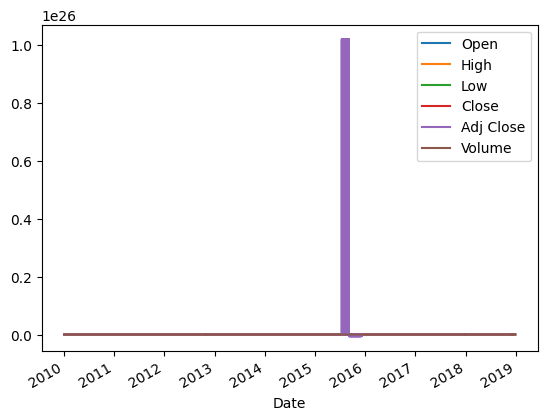

In [6]:
df.plot();

In [7]:
df['Name'].value_counts()

CAH     2265
NEM     2264
SLG     2264
RSG     2264
KIM     2264
        ... 
ALLE    1287
HLT     1270
SYF     1112
SCG      871
IR       411
Name: Name, Length: 104, dtype: int64

In [8]:
goog = df[df['Name'] == 'GOOG'][['Close']].copy().dropna()

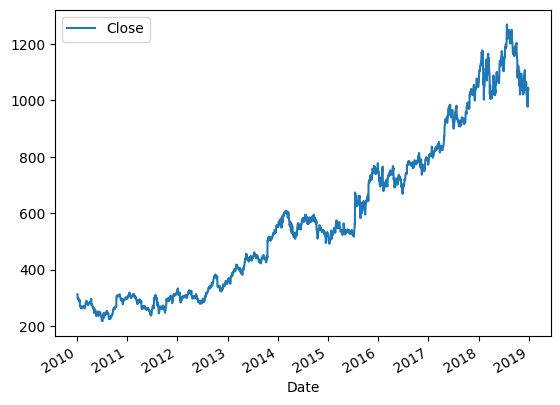

In [9]:
goog.plot();

In [10]:
goog['Logclose'] = np.log(goog['Close'])

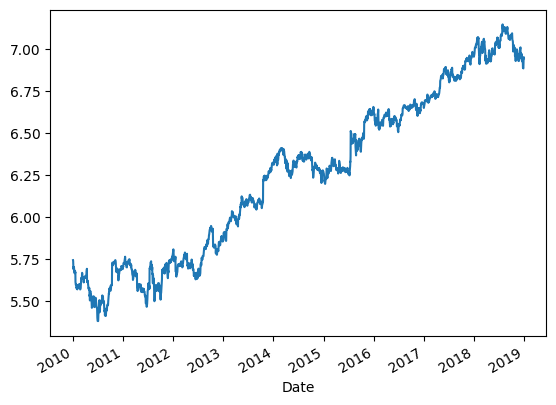

In [11]:
goog['Logclose'].plot();

In [12]:
Ntest = 30

train = goog.iloc[:-Ntest]
test = goog.iloc[-Ntest:]

In [13]:
train_idx = goog.index <= train.index[-1]
test_idx = goog.index > train.index[-1]

In [14]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [15]:
hw = ExponentialSmoothing(
    train['Logclose'],
    seasonal = None,
    initialization_method = 'legacy-heuristic',
    trend = 'add'

)

res_hw = hw.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [16]:
goog.loc[train_idx, 'HoltwintersTrain'] = res_hw.fittedvalues
goog.loc[test_idx, 'HoltwintersTest'] = res_hw.forecast(Ntest).to_numpy()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


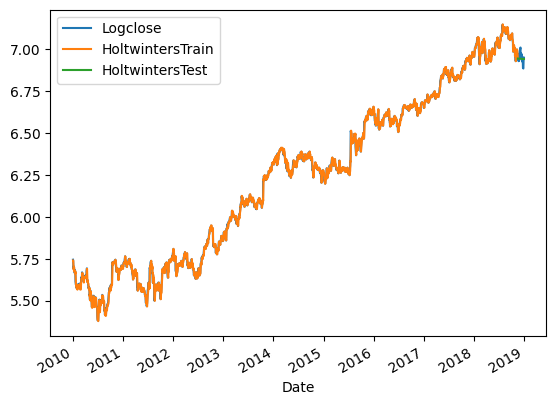

In [17]:
goog[['Logclose', 'HoltwintersTrain', 'HoltwintersTest']].plot();

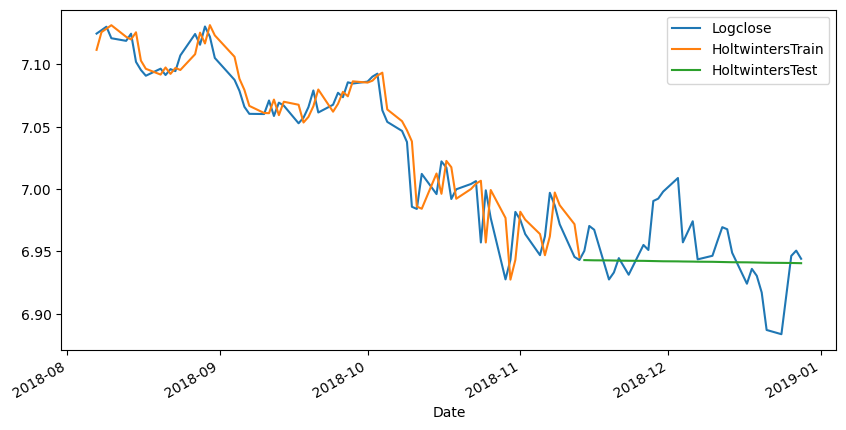

In [18]:
close = ['Logclose', 'HoltwintersTrain', 'HoltwintersTest']
goog.iloc[-100:][close].plot(figsize = (10,5));